### Crawling
- 데이터 수집

#### requests 라이브러리
- 서버에게 페이지 정보를 요청하여 응답받기위한 라이브러리
- 원래는 브라우저를 통해서 서버에 페이지 정보를 요청하지만, 크롤링 할 때는 requests 라이브러리를 활용하여 페이지 정보를 요청후 응답 받는다

In [1]:
# 라이브러리 불러오기
import requests as req
# 페이지 정보를 요청하고 응답받으면 역할이 끝 (req.get() 으로 데이터를 가져와서 변수에 담아준다.)

In [2]:
# 네이버 페이지의 정보 요청 후 응답받기
url = 'http://www.naver.com/'

# url 주소의 페이지 정보 가져오기
res = req.get(url)
res

<Response [200]>

- Response[200] : 정보를 성공적으로 응답 받음
- Response[400] : 클라이언트의 요청에 문제가 있을 때 발생하는 오류
- Response[500] : 서버의 응답에 문제가 있을 때 발생하는 오류

In [3]:
# 우리가 요청했던 naver 페이지의 정보확인
# 크롬에서 F12(개발자도구) Elements 에서 확인 할 수있는 해당 페이지의 HTML 스크립트를 모두 가져온 걸 확인할 수있다.
res.text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

### 네이버 페이지에서 '날씨' 를 검색 후 데이터 수집
(중요)
- 페이지가 변경되면 반드시 페이지 정보를 다시 요청 후 응답 받아야 한다.

In [4]:
# 날씨페이지 정보 요청후 응답받기
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EB%82%A0%EC%94%A8&oquery=opencv&tqi=iffeMlp0J14ssBVc0bKssssstgR-219754'
res = req.get(url)
res.text
# 응답받은 데이터는 문자열 형태
# 컴퓨터가 인식할 수 있는 언어로 변경해주는 작업 필요

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="날씨 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'날씨\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'날씨\'의 네이버 통합검색 결과입니다."> <title>날씨 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230914.css"> <link rel="stylesheet" type="text/css" href="h

### BeautifulSoup 라이브러리
- 문자열 형태의 데이터를 컴퓨터가 인식 할 수 있는 HTML 언어로 변경해주는 라이브러리
- 태그를 통해서 데이터를 추출해야함

In [6]:
# 라이브러리 불러오기
from bs4 import BeautifulSoup as bs

In [7]:
# 이 작업을 beautifulsoup 객체화라고하며 parsing 이라고도 한다
# bs(페이지 정보, '파싱방법')
soup = bs(res.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="날씨 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'날씨'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'날씨'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>날씨 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230914.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic/se

In [8]:
# 브라우저 -> F12(개발자도구) -> Elements(요소) 탭 클릭
# VIEW (a태그)
soup.select('a')
# 모든 a 태그를 가져오며 리스트 형태로 가져옴

[<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>,
 <a href="#content"><span>본문 영역으로 바로가기</span></a>,
 <a class="link" href="https://www.naver.com" onclick="return goOtherCR(this, 'a=sta.naver&amp;r=&amp;i=&amp;u='+urlencode(this.href));"><i class="spnew ico_logo">NAVER</i></a>,
 <a aria-pressed="false" class="bt_setkr" href="#" id="ke_kbd_btn" onclick="return tCR('a=sch.ime');" role="button"> <i class="spnew ico_keyboard">한글 입력기</i> </a>,
 <a aria-pressed="false" class="bt_atcp _btn_arw" data-atcmp-element="" href="#" id="nautocomplete" role="button"><i class="spnew ico_arrow">자동완성 레이어</i></a>,
 <a aria-pressed="false" class="item _delAll" href="#" role="button">전체삭제</a>,
 <a class="kwd" href="#"> <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span> </a>,
 <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>,
 <a class="kwd_help" href="https://help.naver.com/alias/search/word/word_3

In [9]:
soup.select_one('a')

<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>

- 구분자 선택자를 사용해 데이터 가져요기
id 선택자(#) : 전체페이지에서 한번만 사용가능한 구분자
class 선택자(.) : 전체페이지에서 여러번 사용가능, 다른 태그들과 구분할 때 사용

In [25]:
# soup.select('태그명 선택자기호 이름')
soup.select('a.tab')
# select 해당되는 모든 태그를 추출 -> 리스트에 담겨있음


[<a aria-selected="false" class="tab" href="?where=view&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*e.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_view"></i>VIEW</a>,
 <a aria-selected="false" class="tab" href="?where=image&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*i.jmp&amp;r=2&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_image"></i>이미지</a>,
 <a aria-selected="false" class="tab" href="?where=kin&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*k.jmp&amp;r=3&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_kin"></i>지식iN</a>,
 <a aria-selected="false" class="tab" href="?where=influencer&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*F.jmp&amp;r=4&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_inf"></i>인플루언서</a>,
 <a

In [31]:
# select_one은 해당되는 태그들 중 가장 첫번째 데이터를 추출
soup.select_one('a.tab')


<a aria-selected="false" class="tab" href="?where=view&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*e.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_view"></i>VIEW</a>

In [29]:
# 추출한 데이터는 요소(a태그)
# 필요한 데이터는 콘텐츠(태그의 텍스트(View))
# 요소에서 우리가 필요한 콘첸츠만 추출하는 작업 : 요소.text

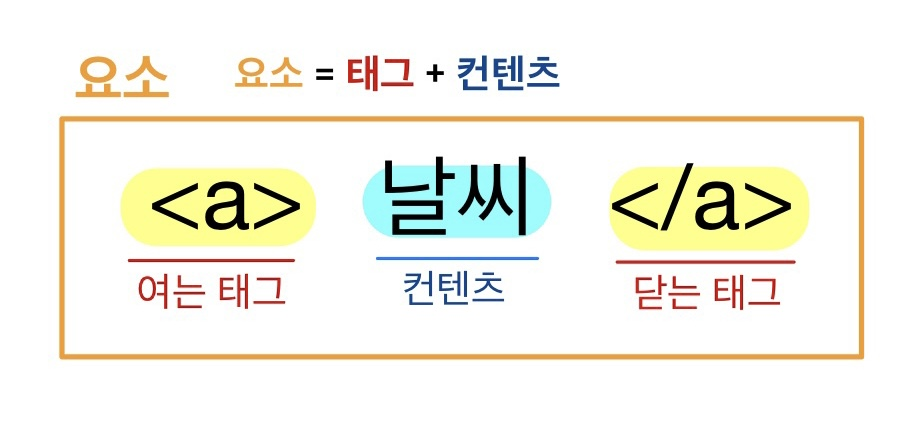

In [32]:
# 콘텐츠 추출 (요소.text)
soup.select_one('a.tab').text

'VIEW'

In [33]:
soup.select('a.tab').text
# 위 데이터는  리스트 형태이기 때문에 .text 가 실행되지않아 에러가 발생한다.(요소에만 적용가능)
# 요소에 적용하기 위해 리스트에서 하나의 요소만을 추출( 인덱싱 진행 후 .text)

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [35]:
# select는 인덱싱 후 text를 진행해야한다.
print(soup.select('a.tab')[0].text)
print(soup.select('a.tab')[1].text)
print(soup.select('a.tab')[2].text)

VIEW
이미지
지식iN


### 날씨페이지에서 현재온도 추출하기

In [48]:
# 1. 페이지 정보 받아오기
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EB%82%A0%EC%94%A8&oquery=opencv&tqi=iffeMlp0J14ssBVc0bKssssstgR-219754'
res = req.get(url)
# 2. 받아온 문자열 정보 HTML 태그로 파싱
soup = bs(res.text, 'lxml')
# 3. 태그 정보를 통해 콘텐츠 추출
soup.select_one('div.temperature_text>strong').text



'현재 온도20.2°'

### 뉴스데이터 제목 추출

In [66]:
# 뉴스 제목 4개 추출하기
# 제일 첫번째 뉴스제목 추출
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%82%A0%EC%94%A8'
res = req.get(url)
soup = bs(res.text, 'lxml')
for data in soup.select('a.news_tit')[:4]:
    print(data.text)

맑지만 쌀쌀한 출근길…서울 아침 기온 13도[오늘날씨]
쌀쌀한 날씨
밤사이 내린 비…출근길 어제보다 더 '쌀쌀', 일교차 큰 날씨
언제 이렇게 추워졌어…쌀쌀해진 날씨에 앙고라·코듀로이 할인전
